In [37]:
import random
from sklearn import datasets
import pandas as pd
import random

iris = datasets.load_iris()
type(iris)

#creata dataframe
iris_df = pd.DataFrame(iris.data)
print("Iris Features:")
print(iris_df.head())
print()
print("Iris target")
print(iris.target)

#rename the columns 
iris_df.columns = ["Sepal length","Sepal width","Petal length", "Petal width"]
iris_df['Species']=iris.target

print()
print("Iris Features:")
print(iris_df.head())
print()

Iris Features:
     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2

Iris target
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Iris Features:
   Sepal length  Sepal width  Petal length  Petal width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0



# EDA - Eploratory data analysis
It is very important to analyze and own the data. 
checking for missing values, value counts of categorical data, verifying the distribution of data, check for outliers, correlations in the data is very important before trying to feed the data for modelling.

The quality the data is, the better the predictions will be.

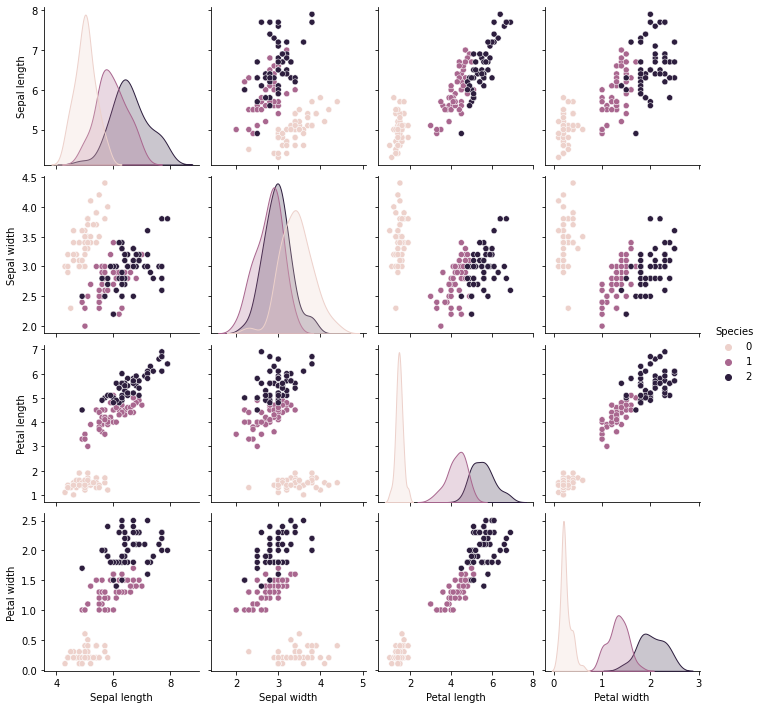

In [38]:
import seaborn as sns
sns.pairplot(iris_df, hue='Species')

#

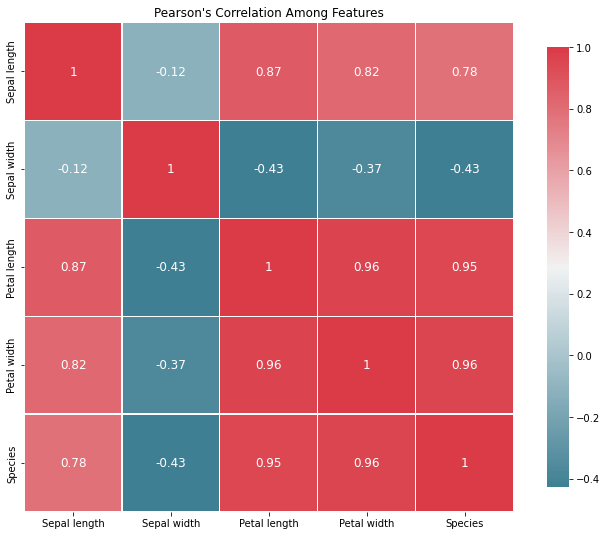

In [39]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(
        iris_df.corr(), 
        cmap = sns.diverging_palette(220, 10, as_cmap = True),
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
plt.title("Pearson's Correlation Among Features")
plt.show()

# observations
There is high correlation between Petal length and Petal width. Same is the case with species. In general in such scenarios, it is good enough to consider one such variables instead of both particularly when there are too many variables in the data set. Since this is a small dataset, we continue to consider all the variables for modelling for now.

# Create a list of models that we want to use for modelling.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

test_size = 0.3
seed = 32
random.seed(seed)

# Build different models for the iris data
models = []
models.append (('Logistic Regression', LogisticRegression(solver ='lbfgs',  multi_class = 'ovr')))
models.append (('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append (('RandomForestClassifier', RandomForestClassifier()))
models.append (('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append (('Support Vector Machine', SVC(gamma ='scale', probability= True)))
models.append (('Guassian Naive Bayes', GaussianNB()))

# train test split
In machine learning model implementation, we keep some portion of the data set aside as test dataset to test the model performance so as to make sure the model is generalized i.e it will predict unknown data as well. If the model works well on train data and do not predict well on test data, which is usually unknown data, there is clearly overfitting problem.
In general we try to use cross validation in such scenarios.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
X = iris_df.iloc[:,[0,1,2,3]]
y = iris.target
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = test_size, 
                                                     random_state = seed,
                                                     shuffle=True,
                                                     stratify = y)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Training Set: 105 rows
Test Set: 45 rows
(105, 4)
(45, 4)
(105,)
(45,)


In [42]:
metrics_df = pd.DataFrame()
metrics_df

iris_classes = iris_df['Species'].unique()
print(iris_classes)


def plot_hist(values, classes = ''):
    plt.hist(values , bins=8)
    plt.xlim(0, 1)
    if(classes != ''):
        plt.legend(classes)
    plt.title('Histogram of predicted probabilities')
    plt.xlabel('Predicted probability of Species')
    plt.ylabel('Frequency')


[0 1 2]


In [43]:
import numpy as np
from sklearn. metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt    
for name, model in models:
    print()
    print("*******************************************")
    print("**************{}****************".format(name))
    print("*******************************************")
    #fit
    model.fit(X_train, y_train)
    print (model)
    
    if hasattr(model, 'feature_importances_'):
        print(model.feature_importances_)
    #predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    np.set_printoptions(suppress=True)
    print('Predicted labels: ', np.round(y_pred_test)[:10])
    print('Actual labels   : ' ,y_test[:10])
    
    print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred_test).sum()))
    
    from sklearn import metrics
    from sklearn.metrics import precision_score, recall_score
    # a. calculate accuracy
    print()
    
    
    train_acc = metrics.accuracy_score(y_train, y_pred_train)
    print("Train Accuracy:", train_acc)
    
    test_acc = metrics.accuracy_score(y_test, y_pred_test)
    print("Test Accuracy:", test_acc)

    # b. precision score
    precision_score = precision_score(y_test, y_pred_test, average='micro')
    print("precision_score:", precision_score)

    # c. recall accuracy
    recall_score = recall_score(y_test, y_pred_test, average='micro')
    print("recall_score:", recall_score)

    # d. confusion matrix
    print()
    cm = metrics.confusion_matrix(y_test, y_pred_test)
    # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
    cm_df = pd.DataFrame(cm,
                         index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                         columns = ['SETOSA','VERSICOLR','VIRGINICA'])
    print("Confusion Matrix:")
    print(cm_df)

    # e. classification_report
    print()
    print("classification report")
    print(classification_report(y_test, y_pred_test))

    # f. predict_proba: individual probabilities
    #A benefit of multinomial logistic regression is that it can predict 
    #calibrated probabilities across all known class labels in the dataset.
    #This can be achieved by calling the predict_proba() function on the model.
    y_scores = model.predict_proba(X_test)
    print(y_scores[:5])
    
    #plot_hist(y_scores, iris_classes)
    
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    print(np.mean(cv_score))


    overfitting = "No"
    if(train_acc > test_acc):
        overfitting = "Yes"
    metrics_df = metrics_df.append({'Model' : name, 
                                    'Train Accuracy' : train_acc, 
                                    'Test Accuracy' : test_acc, 
                                    'Precision' : precision_score, 
                                    'Recall' : recall_score ,
                                     'Overfitting': overfitting}, 
                    ignore_index = True)


*******************************************
**************Logistic Regression****************
*******************************************
LogisticRegression(multi_class='ovr')
Predicted labels:  [1 0 0 0 0 1 1 0 2 2]
Actual labels   :  [1 0 0 0 0 1 1 0 2 2]
Number of mislabeled points out of a total 45 points : 3

Train Accuracy: 0.9523809523809523
Test Accuracy: 0.9333333333333333
precision_score: 0.9333333333333333
recall_score: 0.9333333333333333

Confusion Matrix:
           SETOSA  VERSICOLR  VIRGINICA
SETOSA         15          0          0
VERSICOLR       0         12          3
VIRGINICA       0          0         15

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.80      0.89        15
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg     

# Results

In [44]:
metrics_df

,Model,Train Accuracy,Test Accuracy,Precision,Recall,Overfitting
0,Logistic Regression,0.952381,0.933333,0.933333,0.933333,Yes
1,Linear Discriminant Analysis,0.980952,0.977778,0.977778,0.977778,Yes
2,RandomForestClassifier,1.000000,0.977778,0.977778,0.977778,Yes
3,DecisionTreeClassifier,1.000000,0.977778,0.977778,0.977778,Yes
4,Support Vector Machine,0.971429,0.977778,0.977778,0.977778,No
5,Guassian Naive Bayes,0.942857,0.977778,0.977778,0.977778,No


# cross validation - to generalize and avoid overfitting if any

In [45]:
results = []
# When building different models, use cross validation by dividing the dataset into 10 slices, picking 8 of them for training set, and picking 2 of them for test set.
for name, model in models:
    #names.append (name)
    K_Fold = model_selection.KFold (n_splits = 10, random_state  = seed, shuffle = True)
    cv_results = model_selection.cross_val_score (model, X_train, y_train, cv = K_Fold, scoring = 'accuracy')
    results.append (cv_results)
    message =  "%s:  %f  (%f)" % (name, cv_results.mean (), cv_results.std())
    print (message)   


Logistic Regression:  0.931818  (0.107968)
Linear Discriminant Analysis:  0.970000  (0.045826)
RandomForestClassifier:  0.924545  (0.079985)
DecisionTreeClassifier:  0.914545  (0.076082)
Support Vector Machine:  0.970909  (0.044499)
Guassian Naive Bayes:  0.923636  (0.091832)
